<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [3]:
# Utilice este espacio para escribir el código.

data=pd.read_csv('data/lugares.csv', sep=',')
data.head()

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [4]:
# Utilice este espacio para escribir el código.
data.describe()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


Se puede observar que se tienen solo variables numericas y con algunas estadisticas descriptivas como se puede ver arriba, conteo de valores, la media, desviacion estandar, min, max y los cuartiles.


Ahora abajo vemos que no se tienen valores nulos en ninguna columna de los datos:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Ciudad                                   329 non-null    object
 1   Clima y Terreno                          329 non-null    int64 
 2   Alojamiento                              329 non-null    int64 
 3   Cuidado de la salud y el medio ambiente  329 non-null    int64 
 4   Crimen                                   329 non-null    int64 
 5   Transporte                               329 non-null    int64 
 6   Educación                                329 non-null    int64 
 7   Artes                                    329 non-null    int64 
 8   Recreación                               329 non-null    int64 
 9   Economía                                 329 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ KB


In [6]:
data.count()

Ciudad                                     329
Clima y Terreno                            329
Alojamiento                                329
Cuidado de la salud y el medio ambiente    329
Crimen                                     329
Transporte                                 329
Educación                                  329
Artes                                      329
Recreación                                 329
Economía                                   329
dtype: int64

A continuacion se puede ver un pairplot de seaborne que nos muestra como se distribuye cada variable en la diagonal y en cada otra parte de la matriz como se distribuye cada variable vs la otra:

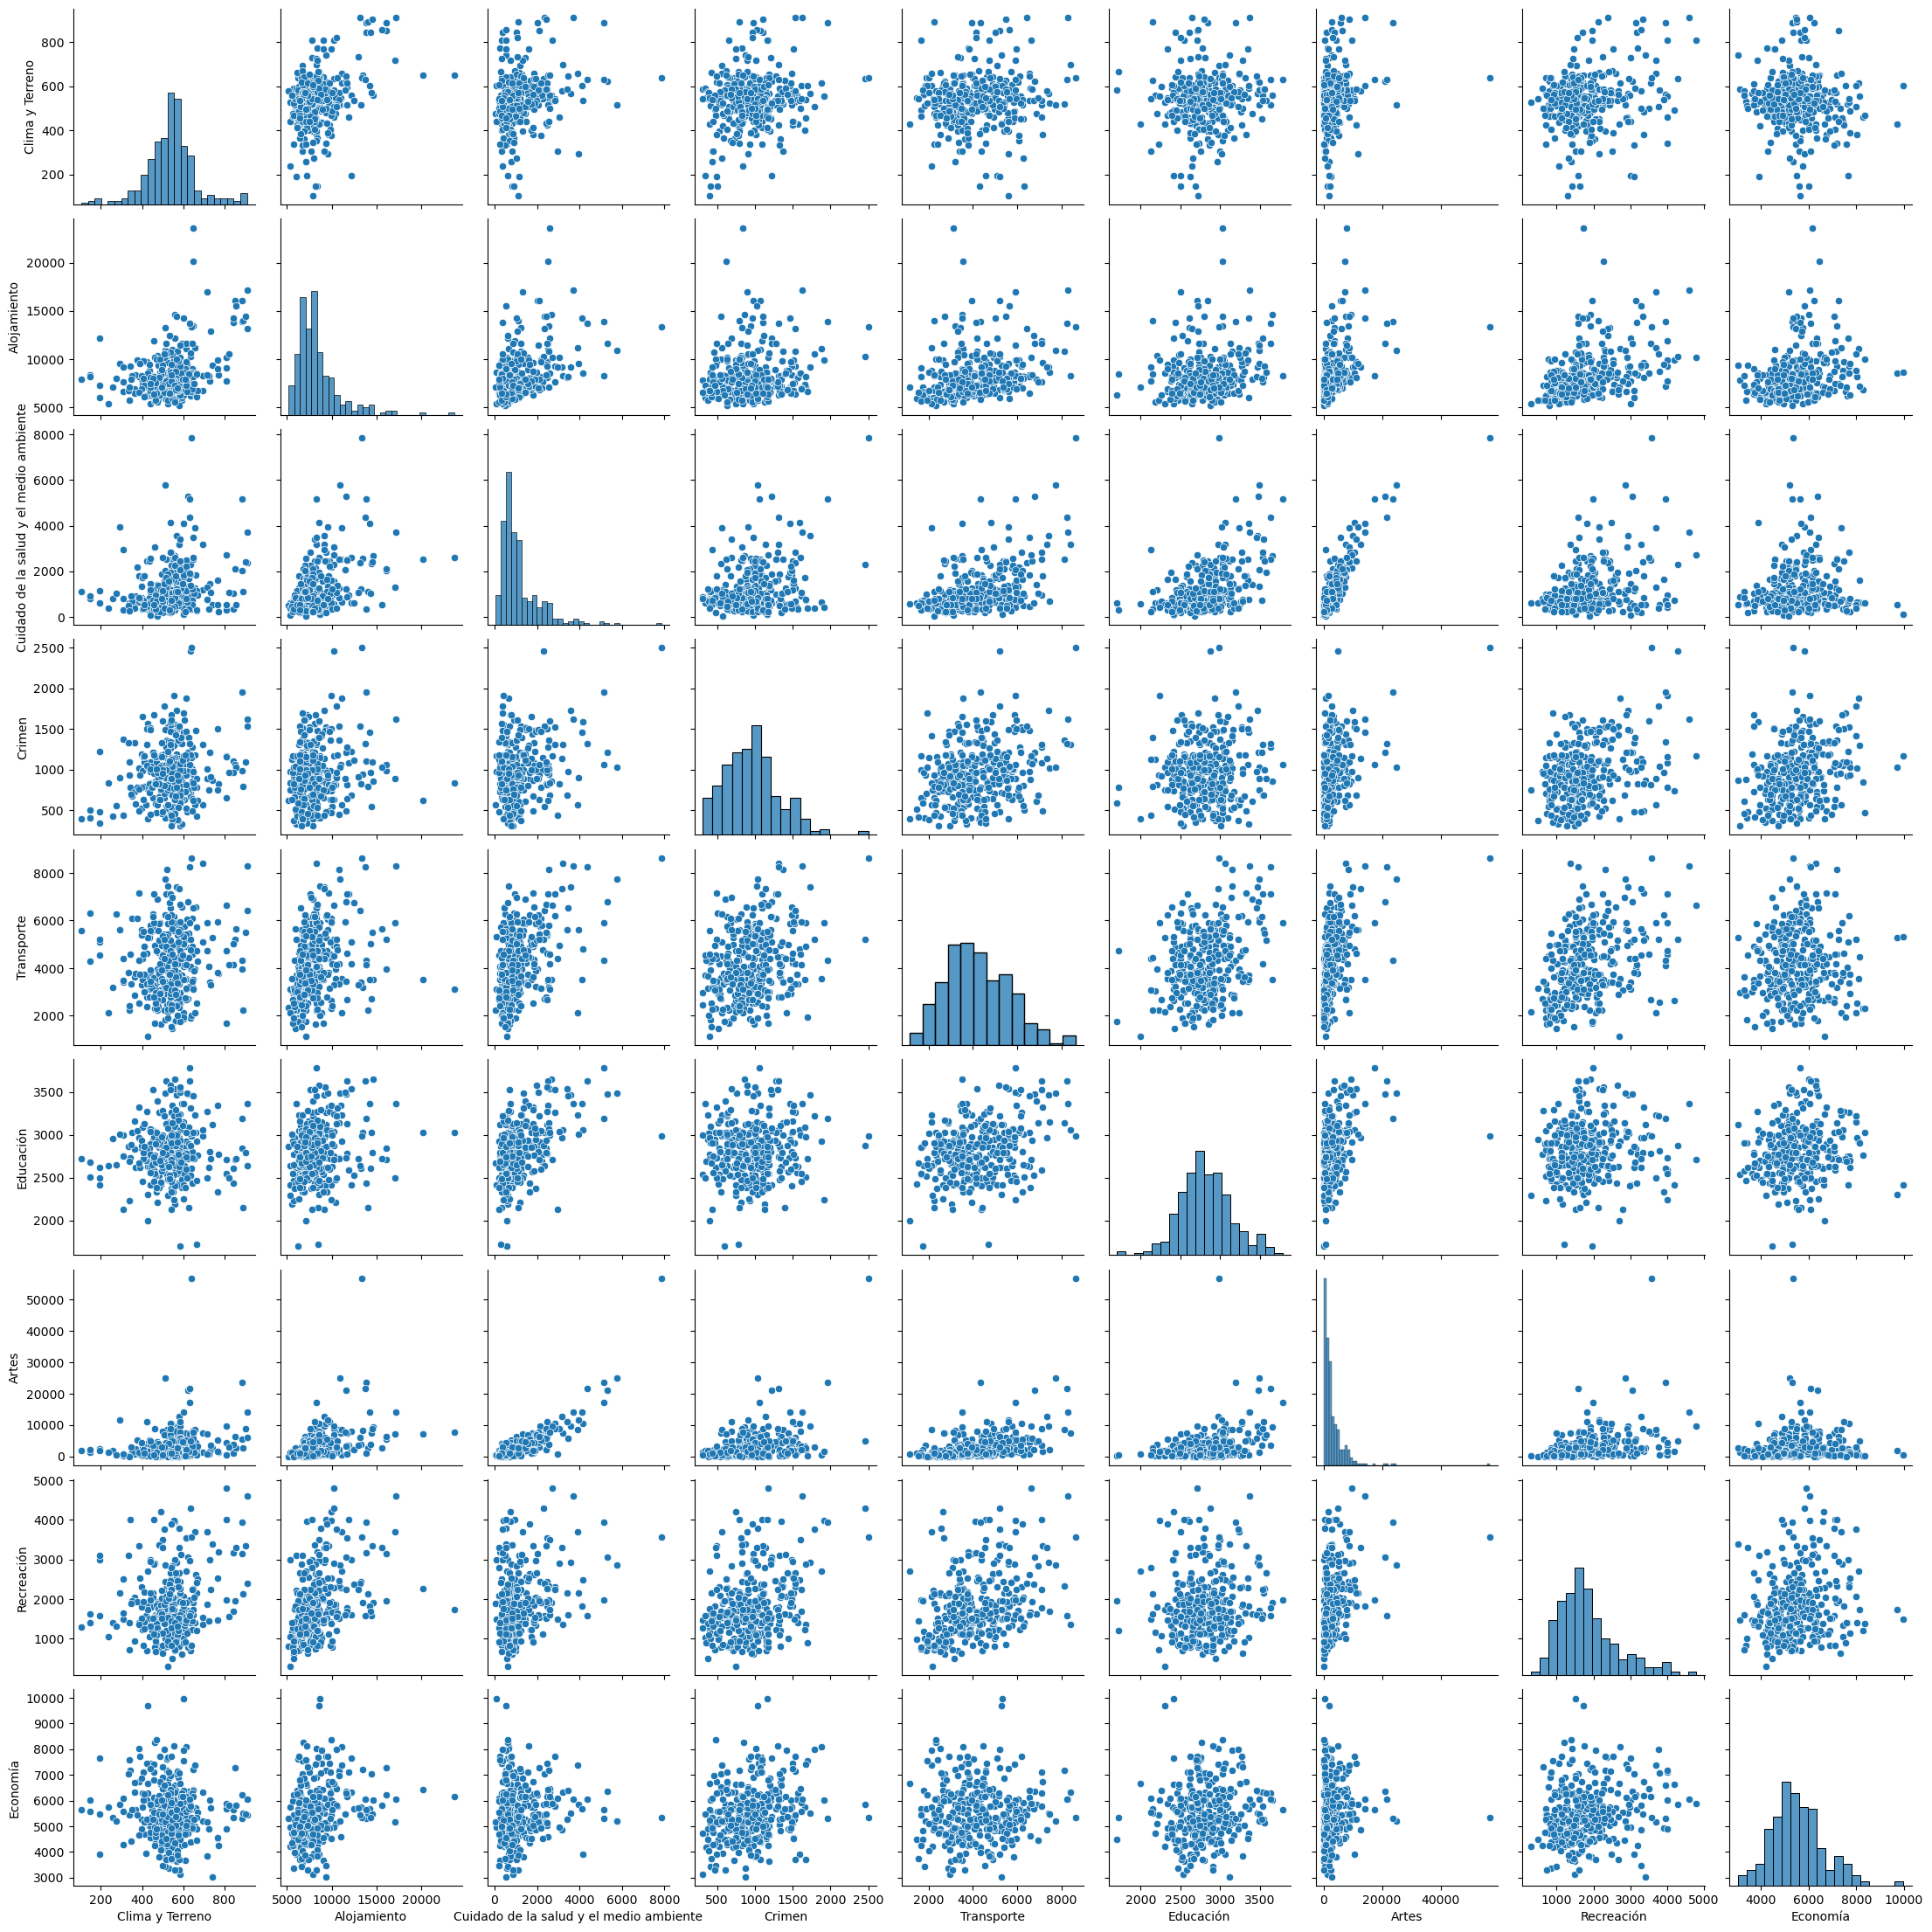

In [7]:
sns.pairplot(data)

Vemos que algunas variablles tiene correlaciones faciles de ver inicialmente, mientras que otras no, asi como tambien que algunas se distribuyen normales y otras no.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

Primero se estandarizan los datos, cuando usamos PCA buscamos maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza $S$ van a cambiar si las unidades de medida de una o más variables cambian. Para que esto no suceda, es práctica habitual  estandarizar las variables.


In [8]:
X=data.set_index('Ciudad')

mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [9]:
# Utilice este espacio para escribir el código.
S=X.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,14594.635555,1.113133e+05,2.584607e+04,8300.968947,1.387087e+04,2500.427144,1.272931e+05,2.083839e+04,-1.311212e+04
Alojamiento,111313.305536,5.689478e+06,1.083791e+06,114344.310772,9.412409e+05,151454.127113,4.967020e+06,8.137605e+05,6.969531e+05
Cuidado de la salud y el medio ambiente,25846.067064,1.083791e+06,1.006013e+06,109137.041784,6.845633e+05,157735.732708,4.031337e+06,2.636735e+05,7.534745e+04
Crimen,8300.968947,1.143443e+05,1.091370e+05,127559.112851,1.485321e+05,8526.061050,6.457665e+05,9.943876e+04,1.007018e+05
Transporte,13870.866530,9.412409e+05,6.845633e+05,148532.093057,2.105921e+06,156413.939136,3.131296e+06,4.275899e+05,9.324006e+04
Educación,2500.427144,1.514541e+05,1.577357e+05,8526.061050,1.564139e+05,102908.118411,5.558915e+05,2.016489e+04,4.164254e+04
Artes,127293.081817,4.967020e+06,4.031337e+06,645766.475851,3.131296e+06,555891.508312,2.155080e+07,1.420142e+06,3.809705e+05
Recreación,20838.387974,8.137605e+05,2.636735e+05,99438.764530,4.275899e+05,20164.885444,1.420142e+06,6.526833e+05,1.520352e+05
Economía,-13112.115557,6.969531e+05,7.534745e+04,100701.794008,9.324006e+04,41642.538096,3.809705e+05,1.520352e+05,1.176072e+06


In [10]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([2.44136687e+07, 4.40800485e+06, 1.63803960e+06, 1.07635578e+06,
       4.78338268e+05, 1.09626252e+04, 9.28099424e+04, 6.69959016e+04,
       2.40851797e+05])

In [11]:
eig_vec=eig_vec.T
eig_vec[[0]].round(2)

array([[0.01, 0.27, 0.18, 0.03, 0.15, 0.03, 0.93, 0.07, 0.03]])

A continuacion se muestra como se convertirian todos los eigenvalores en componentes principales, sin embargo, vamos a hacer una selccion para saber cuantos queremos

In [12]:
#Dataframe para almacenar los componentes principales
df_cp = pd.DataFrame()

#Calcular numero de componentes principales
num_components=eig_vec.shape[1]

for i in range(num_components):
    f = X.dot(eig_vec[:, i])  
    
    df_f = pd.DataFrame(f, columns=[f'CP{i + 1}'])
    
    df_cp = pd.concat([df_cp, df_f], axis=1)

print(df_cp.head())

                                    CP1          CP2          CP3  \
Ciudad                                                              
Abilene,TX                 -2750.847934  5116.825321  6586.861598   
Akron,OH                   -2798.432334  7015.662877  3001.707079   
Albany,GA                  -2473.016131  6457.195200  4538.339696   
Albany-Schenectady-Troy,NY -3605.671246  6621.200174  3969.745878   
Albuquerque,NM             -3280.066409  7022.240976  4144.329430   

                                    CP4          CP5         CP6          CP7  \
Ciudad                                                                          
Abilene,TX                  -988.920154 -1320.944418  500.095781 -2428.876901   
Akron,OH                   -5460.638260 -2360.041165 -526.558562 -1978.015559   
Albany,GA                   -212.398348 -1270.769154  359.370860 -2378.370557   
Albany-Schenectady-Troy,NY -4115.576748 -2646.381850  385.545288 -2306.659747   
Albuquerque,NM             -42

Inicialmente se calculan los eigenvalores y se toma el vector que tiene el eigenvalor mas alto, los vectores asociados a este eigenvalor seran los loadings del primer componente principal, y asi sucesivamente. El array de arriba serian los componentes completos ya convertidos y fueron al final 9. Ahora faltara decidir cuantos se van a usar considerar realmente. Usando la proporcion de la varianza explicada.

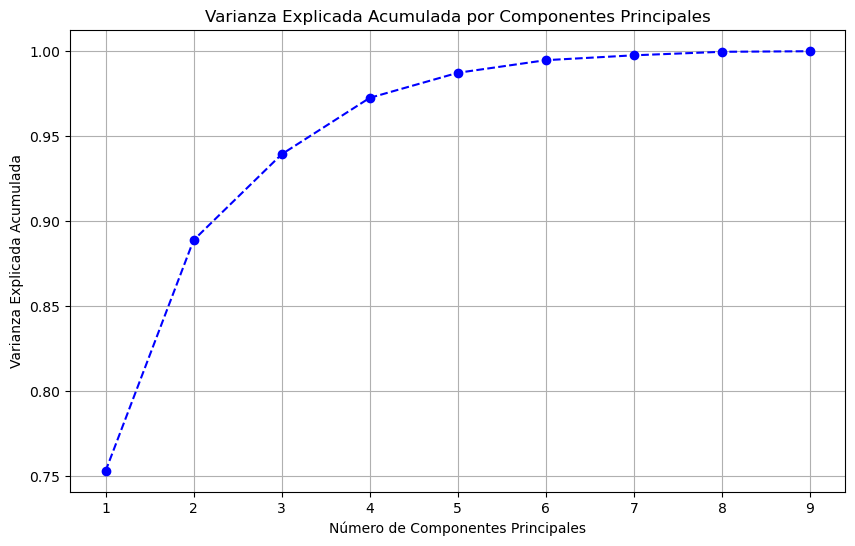

In [23]:
eig_val_sorted = np.sort(eig_val)[::-1]

# Calcular la varianza explicada por cada componente
var_eigenvalores = eig_val_sorted / np.sum(eig_val_sorted)

# Calcular la varianza explicada acumulada
var_eigenvalores_acumulada = np.cumsum(var_eigenvalores)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_eigenvalores_acumulada) + 1), var_eigenvalores_acumulada, marker='o', linestyle='--', color='b')


plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)


plt.show()

In [28]:
for i in range(num_components):
    print(f'La varianza explicada por la componente {i + 1} es: {var_eigenvalores_acumulada[i]}')

La varianza explicada por la componente 1 es: 0.7529034732350574
La varianza explicada por la componente 2 es: 0.8888438022848737
La varianza explicada por la componente 3 es: 0.9393599996529934
La varianza explicada por la componente 4 es: 0.9725541917121859
La varianza explicada por la componente 5 es: 0.987305868227791
La varianza explicada por la componente 6 es: 0.9947335988263943
La varianza explicada por la componente 7 es: 0.9975958039622083
La varianza explicada por la componente 8 es: 0.9996619189575751
La varianza explicada por la componente 9 es: 0.9999999999999999


Como se puede ver con los primeros 4 componentes se explica el 97% de la varianza, por lo que en ese caso se tomarian los primeros 4 componentes, usando la proporcion de la varianza explicada como factor de seleccion:

In [31]:
sorted_indices = np.argsort(eig_val)[::-1]
sorted_eig_val = eig_val[sorted_indices]
sorted_eig_vec = eig_vec[:, sorted_indices]

#Seleccionar los primeros n componentes de eigenvalores y sus correspondientes eigenvectores
num_top_components = 4
top_eig_val = sorted_eig_val[:num_top_components]
top_eig_vec = sorted_eig_vec[:, :num_top_components]

df_cp = pd.DataFrame()

for i in range(num_top_components):
    f = X.dot(top_eig_vec[:, i])  # Calcular el componente principal
    
    df_f = pd.DataFrame(f, columns=[f'CP{i + 1}'])  # Crear DataFrame para este componente
    
    df_cp = pd.concat([df_cp, df_f], axis=1)  # Concatenar al DataFrame principal

print(df_cp.head())

                                    CP1          CP2          CP3          CP4
Ciudad                                                                        
Abilene,TX                 -2750.847934  5116.825321  6586.861598  -988.920154
Akron,OH                   -2798.432334  7015.662877  3001.707079 -5460.638260
Albany,GA                  -2473.016131  6457.195200  4538.339696  -212.398348
Albany-Schenectady-Troy,NY -3605.671246  6621.200174  3969.745878 -4115.576748
Albuquerque,NM             -3280.066409  7022.240976  4144.329430 -4223.420241


Otro criterio es el de Kaiser, el cual sugiere que solo se retengan los componentes principales cuyos eigenvalores sean mayores a 1, como los datos estan estandarizadoscomo se ve a continuacion:


Sin embargo se ve que el criterio dice que se tomen 9, por esta razon se utilizaran solamente las 4 mencionadas anteriormente

In [39]:
num_components_kaiser = np.sum(sorted_eig_val > 1)
print(f'Número de componentes principales según el criterio de Kaiser: {num_components_kaiser}')


Número de componentes principales según el criterio de Kaiser: 9


### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

In [32]:
# Utilice este espacio para escribir el código.

print(f'Tamaño del DataFrame original: {X.shape}')


print(f'Tamaño del DataFrame reducido: {df_cp.shape}')

Tamaño del DataFrame original: (329, 9)
Tamaño del DataFrame reducido: (329, 4)


Se puede ver que si se redujo la dimension del modelo trabajado, pasa de 9 componentes a solo 4

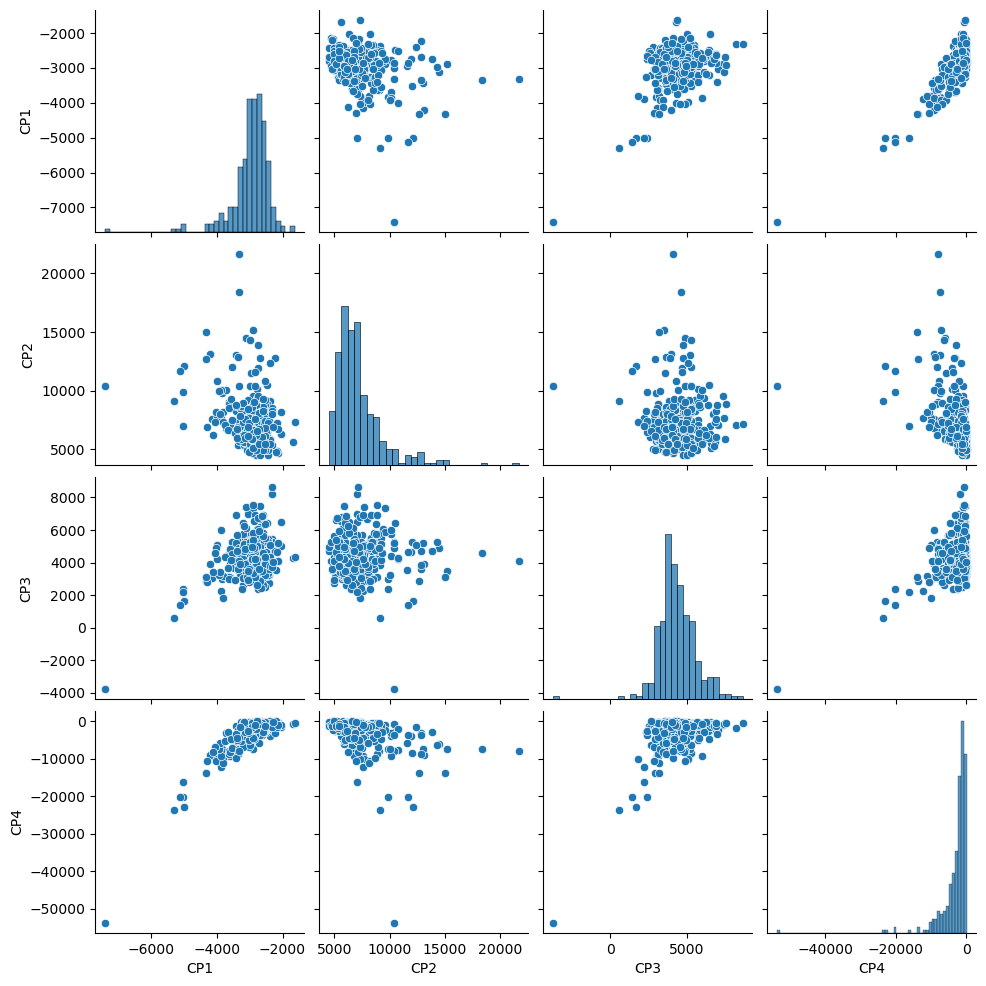

In [33]:
sns.pairplot(df_cp)

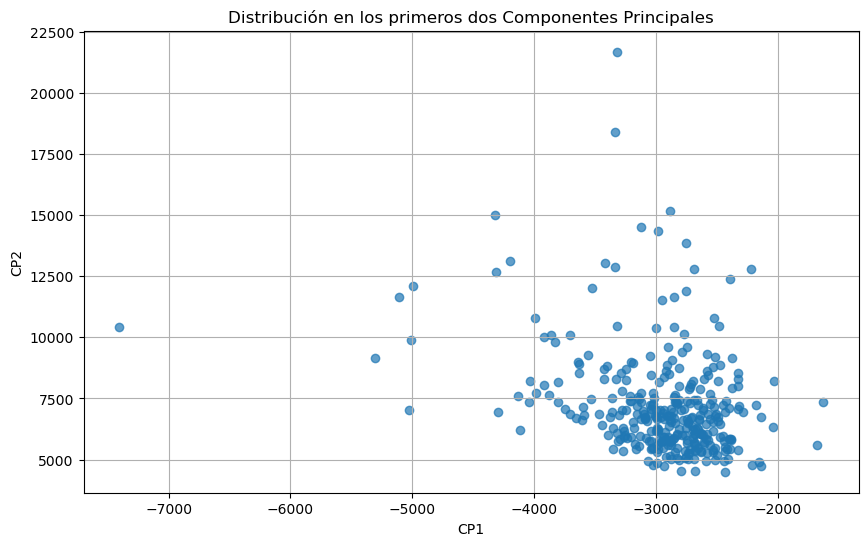

In [40]:
# Graficar los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_cp['CP1'], df_cp['CP2'], alpha=0.7)
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.title('Distribución en los primeros dos Componentes Principales')
plt.grid(True)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).